**Question 1(a)**

1(a). The computational cost is $m^2*n^2$, since for each pixel we need to multiple the filter on the surrounding $m^2$ pixels. Each box in the filter will multiple the corresponding pixels which will takes $m^2$ computations and there are $n^2$ pixels in total.

**Question 1(b)**

1(b). The computational cost is 2m*$n^2$. If a filter is seperable, the filter size can be reduced to m and since for each pixel we multiple a filter with m boxes and do it both horizontally and vertically, thus total cost will be 2m for each pixels and there are $n^2$ pixels in total.

**Question 2**

2. First, we filter the image with derivative of Gaussian with horizontal and vertical directions respectively (Gaussian filter is to blur the image in order to decrease the noise and taking the deriative is to find any rapid change of intensity in the image. Moreover, taking the derivative of Gaussian directly can speed up the computation). Then, base on the 2 filtered images with the derivative respect to x and y, we can calculate the magnitude and orientation of the gradient and make a new image resulting from the magnitude. Next we do a non-maximum suppress such that we only pick the maximum gradient along the gradient direction to erase those non-important edges part. Lastly we define 2 thresholding(low and high) and use high threshold to start edges curves and low threshold to continue so as to erase those not significant edges.

**Question 3**
3. Because if there is a rapid change in terms of intensity at the region, the second derivative at that point will be huge which means it is more likely to be an edge. Vice versa if there is small change in intensity, the second derivative will be quite low. By taking the sum of both second derivative of x square and y square, we will know the how intensity is changing at that region in order to detect edges. Gaussian filter is to blur the image in order to decrease noise because derivative is very sensetive to noise. To simplify calculation we can take second derivative on Gaussian filter, and therefore Laplacian of Gaussian can be used to detect edges.

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import scipy
from scipy import signal
import math

gray = cv2.imread('gray.jpg')
portrait = cv2.imread('portrait.jpg')
color = cv2.imread('color.jpg')

In [18]:
# -------------------Question 4(a)-------------------

def MyCorrelation(image, filter, mode):
    full = len(filter[0])
    f_length = len(filter[0]) // 2
    if mode == "valid":
        result = multiplef(image,filter)
        return result[f_length:image.shape[0]-f_length,f_length:image.shape[1]-f_length]
    if mode == "full":
        large = np.zeros((image.shape[0]+2*full-2, image.shape[1]+2*full-2)) 
        large[full-1:large.shape[0]-full+1,full-1:large.shape[1]-full+1] = image # pad with 0 intensity
        result = multiplef(large,filter)
        return result[f_length:large.shape[0]-f_length,f_length:large.shape[1]-f_length]
    if mode == "same":
        medium = np.zeros((image.shape[0]+2*f_length, image.shape[1]+2*f_length))
        medium[f_length:medium.shape[0]-f_length,f_length:medium.shape[1]-f_length] = image # pad with 0 intensity
        result = multiplef(medium,filter)
        return result[f_length:medium.shape[0]-f_length,f_length:medium.shape[1]-f_length]
        
        
def multiplef(image, filt):
    f_length = len(filt[0]) // 2
    result = np.zeros((image.shape[0], image.shape[1]))
    for row in range(f_length, image.shape[0]-f_length):
        for col in range(f_length, image.shape[1]-f_length):
            result[row][col] = (filt*image[row-f_length:row+f_length+1,col-f_length:col+f_length+1]).sum()
    return result

# sample test
sample_img = np.array([[1,1,1,1],
                       [2,2,2,2],
                       [3,3,3,3],
                       [4,4,4,4]])
sample_filter = np.array([[1/9,1/9,1/9],
                          [1/9,1/9,1/9],
                          [1/9,1/9,1/9]])
valid_image = MyCorrelation(sample_img,sample_filter, "valid")
same_image = MyCorrelation(sample_img,sample_filter, "same")
full_image = MyCorrelation(sample_img,sample_filter, "full")
print("The smaple image is")
print(sample_img)
print("\n")
print("The filter is")
print(sample_filter)
print("\n")
print("The result image with valid mode is")
print(valid_image)
print("\n")

print("The result image with same mode is")
print(same_image)
print("\n")

print("The result image with full mode is")
print(full_image)

The smaple image is
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


The filter is
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


The result image with valid mode is
[[2. 2.]
 [3. 3.]]


The result image with same mode is
[[0.66666667 1.         1.         0.66666667]
 [1.33333333 2.         2.         1.33333333]
 [2.         3.         3.         2.        ]
 [1.55555556 2.33333333 2.33333333 1.55555556]]


The result image with full mode is
[[0.11111111 0.22222222 0.33333333 0.33333333 0.22222222 0.11111111]
 [0.33333333 0.66666667 1.         1.         0.66666667 0.33333333]
 [0.66666667 1.33333333 2.         2.         1.33333333 0.66666667]
 [1.         2.         3.         3.         2.         1.        ]
 [0.77777778 1.55555556 2.33333333 2.33333333 1.55555556 0.77777778]
 [0.44444444 0.88888889 1.33333333 1.33333333 0.88888889 0.44444444]]


In [19]:
# -------------------Question 4(b)-------------------
def MyConvolution(image, filter, mode):
    cor_img = MyCorrelation(image, filter, mode) # call Mycorrelation
    result = np.zeros((cor_img.shape[0],cor_img.shape[1]))
    for i in range(cor_img.shape[0]):
        for j in range(cor_img.shape[1]):
            result[cor_img.shape[0]-i-1][cor_img.shape[1]-j-1] = cor_img[i][j]
    return result

# sample test
con_image = MyConvolution(sample_img,sample_filter, "valid")
print("The smaple image is")
print(sample_img)
print("\n")
print("The filter is")
print(sample_filter)
print("\n")
print("The result convolution image with valid mode is")
print(con_image)
print("\n")

The smaple image is
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


The filter is
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


The result convolution image with valid mode is
[[3. 3.]
 [2. 2.]]




Original portrait


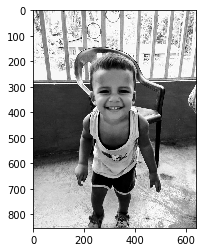

In [20]:
# -------------------Question 4(c)-------------------
# change the image from RGB into greyscale
img_gray = np.zeros((portrait.shape[0],portrait.shape[1]))
for row in range(len(portrait)):
    for col in range(len(portrait[row])):
        img_gray[row][col] = np.average(portrait[row][col])
print("Original portrait")
plt.imshow(img_gray,cmap='gray')
plt.show()

I used a linear filter such that it take the average instensity of the surronding pixels in order to blur the whole
image and then manually select the pixel where the face is located and replace it with the original portrait


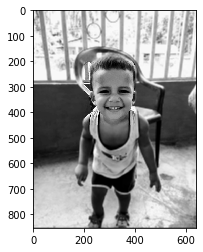

In [21]:
# blur out background portrait
blur_filter = np.array([[1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49],
                          [1/49,1/49,1/49,1/49,1/49,1/49,1/49]])
# blur the whole image by MyCorrelation function
new_p = MyCorrelation(img_gray, blur_filter, "same")
# manually change the filter image face into the original image face
new_p[200:450,200:400] = img_gray[200:450,200:400]
print("I used a linear filter such that it take the average instensity of the surronding pixels in order to blur the whole")
print("image and then manually select the pixel where the face is located and replace it with the original portrait")
plt.imshow(new_p,cmap='gray')
plt.show()

**Question 5(a)**
A filter is seperable if the operation can be significantly sped up by first performing a one-dimensional horizontal filter followed by a one-dimensional vertical filter which only require a total of 2K operations per pixels. In term of maths, looking at the singular value decomposition, and if only one singular value is non-zero, then it is a seperable filter.

In [32]:
# -------------------Question 5(b)-------------------
def isSeparableFilter(filter):
    u, s, v = np.linalg.svd(filter)
    rank = np.sum(s > 1e-10)
    if rank == 1:
        zta = math.sqrt(s[0])
        u1 = []
        for i in range(len(u)):
            u1.append(-u[i][0] * zta)
        v1 = []
        for j in range(len(v[0])):
            v1.append(-v[0][j] * zta)
        return True,u1,v1
    else:
        return False
    
# sample test
sample_filter1 = np.array([[1,1,1],
                       [2,2,2],
                       [3,3,3]])
result1,vertical,horizontal = isSeparableFilter(sample_filter1)
print("The first sample filter is")
print(sample_filter1)
print("which is seperable")
print("\n")
print("The result of our function is")
print(result1)
print("vertical filter is")
print(vertical)
print("horizontal filter is")
print(horizontal)
print("\n")
sample_filter2 = np.array([[1,-1,-1],
                       [2,2,2],
                       [3,3,3]])
result2 = isSeparableFilter(sample_filter2)
print("The second sample filter is")
print(sample_filter2)
print("which is not seperable")
print("\n")
print("The result of our function is")
print(result2)

The first sample filter is
[[1 1 1]
 [2 2 2]
 [3 3 3]]
which is seperable


The result of our function is
True
vertical filter is
[0.6803749333171202, 1.3607498666342401, 2.04112479995136]
horizontal filter is
[1.4697778401749315, 1.4697778401749315, 1.4697778401749315]


The second sample filter is
[[ 1 -1 -1]
 [ 2  2  2]
 [ 3  3  3]]
which is not seperable


The result of our function is
False


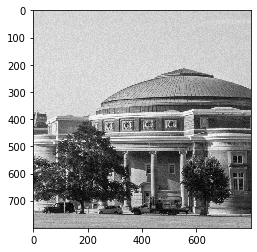

In [23]:
# -------------------Question 6(a)-------------------
grayscale = np.zeros((gray.shape[0],gray.shape[1]))
for row in range(len(gray)):
    for col in range(len(gray[row])):
        grayscale[row][col] = np.average(gray[row][col])
def AddRandNoise(image):
    for row in range(len(image)):
        for col in range(len(image[row])):
            noise = random.uniform(-0.05, 0.05)
            image[row][col] = image[row][col] / 255 # scale the image into [0,1]
            image[row][col] += noise
            image[row][col] = image[row][col] * 255 # scale back the image
    return image
new1 = AddRandNoise(grayscale)
plt.imshow(new1,cmap='gray')
plt.show()

The linear filter used is a 3x3 matrix and by taking average of the surrounding 3x3 pixels it blurs the whole image in order to reduce noise.


The filter used is
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


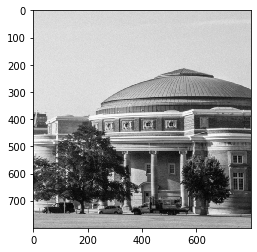

In [24]:
# -------------------Question 6(b)-------------------
noiseRemove = MyCorrelation(new1,sample_filter,"same")
print("The linear filter used is a 3x3 matrix and by taking average of the surrounding 3x3 pixels it blurs the whole image in order to reduce noise.")
print("\n")
print("The filter used is")
print(sample_filter)
plt.imshow(noiseRemove,cmap='gray')
plt.show()

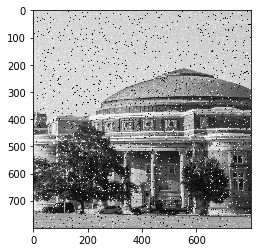

In [25]:
# -------------------Question 6(c)-------------------
def AddSaltAndPepperNoise(image, density, mode):
    new = image.copy()
    for row in range(len(image)):
        for col in range(len(image[row])):
            if mode == "grey":
                noise = random.uniform(-1, 1)
                if noise >= 0 and noise <= density:
                    new[row][col] = 0
                elif noise >= -density and noise <= 0:
                    new[row][col] = 255
                else:
                    new[row][col] = image[row][col]
            elif mode == "color":
                noise = random.uniform(0, 1)
                if noise < 0.05:
                    lst = [0,255]
                    new[row][col] = [random.choice(lst),random.choice(lst),random.choice(lst)]
                else:
                    new[row][col] = image[row][col]
    return new
pepper = AddSaltAndPepperNoise(grayscale, 0.05, "grey")
plt.imshow(pepper,cmap='gray')
plt.show()

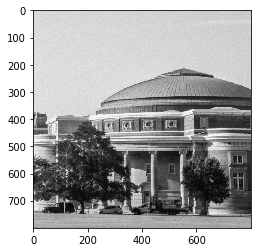

I used a median filter which take the median pixel of the surrounding pixels. It works because salt and pepper are extreme large or small in terms of intensity and the median is robust to extreme value.


In [26]:
# -------------------Question 6(d)-------------------
median = scipy.signal.medfilt(pepper)
plt.imshow(median,cmap='gray')
plt.show()
print("I used a median filter which take the median pixel of the surrounding pixels. It works because salt and pepper are extreme large or small in terms of intensity and the median is robust to extreme value.")

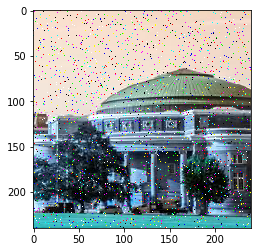

In [27]:
# -------------------Question 6(e)-------------------
pepper_c = AddSaltAndPepperNoise(color, 0.05, "color")
plt.imshow(pepper_c)
plt.show()

The method I use is iterating through all the pixels and check whether it is noise pixel, since noise pixel has the property of 255 or 0 intensity. If it is a noise pixel it will just take the average intensity of the surrounding 25 pixels, if any of the surrounding pixel is a noise the function won't take it into account. By this method we can get rid of all the noise pixels.


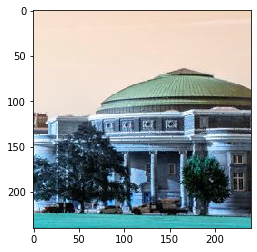

In [28]:
def deNoise(image):
    for row in range(0,len(image)):
        for col in range(0,len(image[row])):
            if checkNoise(image[row][col]):
                sum1 = 0
                sum2 = 0
                sum3 = 0
                count = 0
                for i in range(-2,3):
                    for j in range(-2,3):
                        if len(image)>(row+i)>=0: 
                            if len(image[row+i]) >(col+j)>=0:
                                if not checkNoise(image[row+i][col+j]):
                                    sum1 += image[row+i][col+j][0]
                                    sum2 += image[row+i][col+j][1]
                                    sum3 += image[row+i][col+j][2]
                                    count += 1
                image[row][col] = [sum1/count, sum2/count, sum3/count]
    return image

def checkNoise(vector):
    one = vector[0]
    two = vector[1]
    three = vector[2]
    if (one == 0 or one == 255) and (two == 0 or two == 255) and (three == 0 or three == 255):
        return True
    else:
        return False
print("The method I use is iterating through all the pixels and check whether it is noise pixel, since noise pixel has the property of 255 or 0 intensity. If it is a noise pixel it will just take the average intensity of the surrounding 25 pixels, if any of the surrounding pixel is a noise the function won't take it into account. By this method we can get rid of all the noise pixels.")
new_image = deNoise(pepper_c)
plt.imshow(new_image)
plt.show()